In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plot_settings
import h5py

### Load and plot data

In [6]:
file_path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroGW\GW-signals\H-H1_LOSC_4_V1-1126259446-32.hdf5"
data = h5py.File(file_path, 'r')

In [35]:
h = data['strain']['Strain'][:]

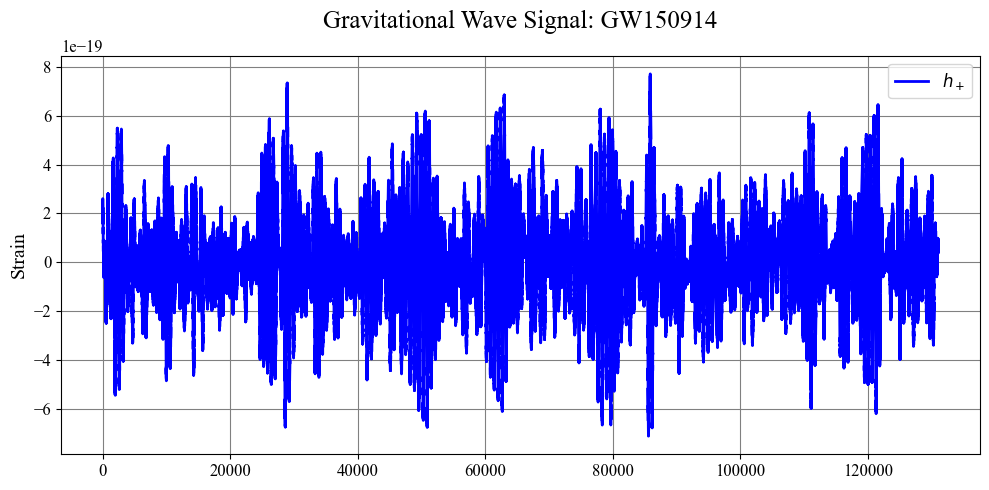

In [43]:
plt.plot(h, label=r'$h_+$', color='blue')
plt.ylabel('Strain')
plt.title('Gravitational Wave Signal: GW150914')
plt.legend()

### To analyze frequency content we can look at the PSD

In [64]:
from scipy.signal import welch

In [84]:
freqs, Pxx = welch(h, fs=4096, nperseg=2048, window='hamming', noverlap=200, return_onesided=True, axis=-1, scaling='density', detrend='linear')

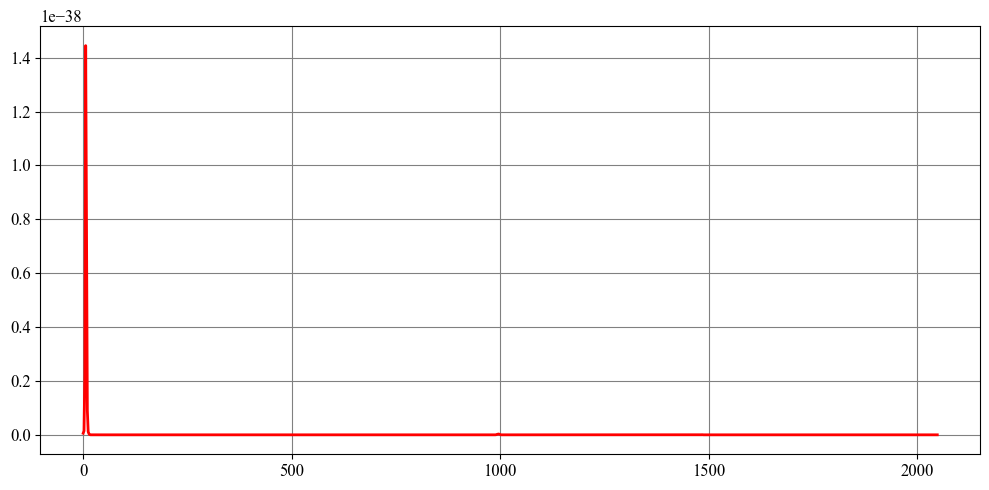

In [86]:
plt.plot(freqs, Pxx, label='Power Spectral Density', color='red')

I think there is a lot of white noise here, since the PSD is flat over most frequencies. \
The PSD peaks at very low frequenies, Red noise? \
To better understand the frequency content of the signal I think we have to filter it before computing PSD. \
We can look for a signal @ 200 Hz ca, so we can use a lowpass filter.

In [90]:
from scipy import signal

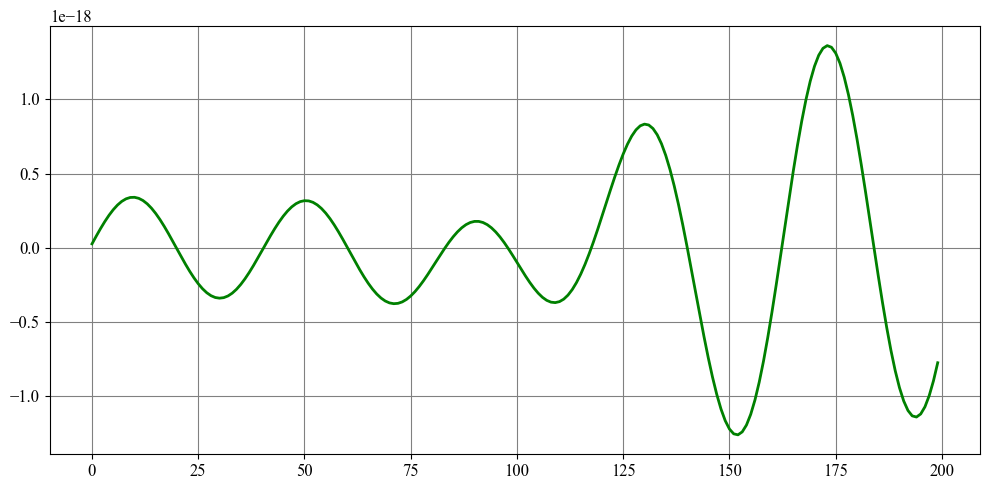

In [106]:
sos = signal.butter(1, np.arange(100,2000,1), fs=4096, btype='bandpass', analog=False, output='sos')
filtered_h = signal.sosfilt(sos, h)
plt.plot(filtered_h, label='Filtered Signal', color='green')